<a href="https://colab.research.google.com/github/HaroldSthid/OceanBig5/blob/main/OCEAN_Big5_DiplomadoDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Personalidad OCEAN en Google Colab
##Este script realiza un análisis completo de personalidad utilizando el modelo OCEAN (Big Five), desde la carga de datos hasta la visualización de resultados, todo integrado con Google Drive para facilitar el acceso y manejo de los datos en un entorno colaborativo como Google Colab.


### Paso 1: Montar Librerias + Google Drive
Este paso es necesario para acceder a los archivos almacenados en Google Drive, permitiendo que el script opere directamente con los datos almacenados en la nube sin necesidad de descargarlos manualmente al entorno local.


In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive



### Paso 2: Carga de Datos
La función `cargar_datos` se encarga de leer el archivo Excel desde Google Drive, utilizando la ruta especificada al archivo que contiene las respuestas del cuestionario OCEAN.

In [3]:
# Asegúrate de tener la ruta correcta a tu archivo xlsx aquí
file_path = '/content/drive/My Drive/Diplomado_DS/OCEAN_BigFive2024-1.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')

def cargar_datos(filepath):
    data = pd.read_excel(filepath)
    return data

### Paso 3: Limpieza y Preparación de Datos
En este paso, la función `limpiar_y_preparar_datos` elimina columnas irrelevantes como Timestamp, Username, y Email, y renombra las columnas restantes para que correspondan claramente a las dimensiones del modelo OCEAN. Este proceso asegura que los datos estén listos para un análisis más detallado.

In [4]:
def limpiar_y_preparar_datos(data):
    data = data.drop(columns=['Timestamp', 'Username', 'Email'])
    columns_rename = {
        'Me siento entusiasmado(a) por explorar nuevos lugares y probar nuevas actividades en mi tiempo libre.': 'Openness',
        'Prefiero tener una agenda organizada a ser esponteeo(a) en mi di­a a di­a.': 'Conscientiousness',
        'Disfruto mas de reuniones grandes con muchos amigos que de encuentros I­ntimos.': 'Extraversion',
        'Es importante para mi­ ayudar a los demas y participar en actividades comunitarias.': 'Agreeableness',
        'Me perturban facilmente las situaciones de mucho estres.': 'Neuroticism',
        'Me adapto facilmente a nuevas tecnologias y entornos en constante cambio.': 'Openness_2',
        'Prefiero trabajar en proyectos que requieren un enfoque detallado a tareas mas flexibles.': 'Conscientiousness_2',
        'A menudo busco emociones fuertes y actividades que me hagan sentir adrenalina.': 'Extraversion_2',
        'Frecuentemente participo en actividades voluntarias o de ayuda comunitaria.': 'Agreeableness_2',
        'Me siento comodo(a) con cambios inesperados o planes de ultimo momento.': 'Neuroticism_2',
        'Nickname': 'Nickname'
    }
    data.rename(columns=columns_rename, inplace=True)
    return data

### Paso 4: Análisis Exploratorio
Antes de proceder al cálculo de un score compuesto, el `analisis_exploratorio` proporciona un vistazo a las estadísticas descriptivas de los scores y visualiza su distribución. Esto es fundamental para entender la dispersión y centralidad de los datos, permitiendo identificar cualquier anomalía o patrón notable antes de cualquier análisis posterior.

In [5]:
def analisis_exploratorio(data):
    print("Estadísticas Descriptivas:\n", data.describe())
    fig, axs = plt.subplots(3, 2, figsize=(12, 10))
    columns = ['Openness_Score', 'Conscientiousness_Score', 'Extraversion_Score', 'Agreeableness_Score', 'Neuroticism_Score']
    for i, col in enumerate(columns):
        axs[i//2, i%2].hist(data[col], bins=10, color='skyblue', alpha=0.7)
        axs[i//2, i%2].set_title(f'Distribución de {col}')
    plt.tight_layout()
    plt.show()

### Paso 5: Cálculo de Scores de Personalidad
La función `calcular_scores` calcula el score promedio para cada una de las cinco dimensiones de la personalidad basándose en las respuestas relevantes. Este paso es crucial para obtener una representación numérica de las tendencias de personalidad de cada individuo.

In [6]:
def calcular_scores(data):
    data['Openness_Score'] = data[['Openness', 'Openness_2']].mean(axis=1)
    data['Conscientiousness_Score'] = data[['Conscientiousness', 'Conscientiousness_2']].mean(axis=1)
    data['Extraversion_Score'] = data[['Extraversion', 'Extraversion_2']].mean(axis=1)
    data['Agreeableness_Score'] = data[['Agreeableness', 'Agreeableness_2']].mean(axis=1)
    data['Neuroticism_Score'] = data[['Neuroticism', 'Neuroticism_2']].mean(axis=1)
    return data

### Paso 6: Cálculo del Score Ponderado
Finalmente, la función `calcular_score_ponderado` utiliza pesos definidos para cada dimensión de la personalidad para calcular un score compuesto para cada individuo. Este score representa una medida integrada de la personalidad, útil para comparaciones o clasificaciones más amplias.

In [13]:
def calcular_scores(data):
    # Asumiendo que 'Openness' ya está correctamente renombrada y no necesita una segunda pregunta.
    # 'Conscientiousness' parece tener solo una pregunta directa también.
    data['Openness_Score'] = data['Openness']
    data['Conscientiousness_Score'] = data['Conscientiousness']
    data['Extraversion_Score'] = data[['Extraversion', 'Extraversion_2']].mean(axis=1)
    data['Agreeableness_Score'] = data[['Agreeableness', 'Agreeableness_2']].mean(axis=1)
    data['Neuroticism_Score'] = data['Frecuentemente me preocupo por situaciones futuras o imprevistas.']
    return data

In [14]:
print(data.columns)

Index(['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness',
       'Frecuentemente me preocupo por situaciones futuras o imprevistas.',
       'Regularmente me interesa aprender sobre tradiciones y culturas diferentes.',
       'Prefiero actividades que requieren un enfoque detallado a tareas mas flexibles.',
       'Extraversion_2', 'Agreeableness_2', 'Neuroticism_2', 'Nickname'],
      dtype='object')


### Paso 7: Visualización y Salida de Resultados

Estadísticas Descriptivas:
         Openness  Conscientiousness  Extraversion  Agreeableness  \
count  14.000000          14.000000     14.000000      14.000000   
mean    4.142857           3.928571      2.357143       4.142857   
std     1.099450           0.828742      1.081818       0.864438   
min     2.000000           3.000000      1.000000       3.000000   
25%     4.000000           3.000000      2.000000       3.250000   
50%     4.500000           4.000000      2.000000       4.000000   
75%     5.000000           4.750000      2.750000       5.000000   
max     5.000000           5.000000      5.000000       5.000000   

       Frecuentemente me preocupo por situaciones futuras o imprevistas.  \
count                                          14.000000                   
mean                                            3.714286                   
std                                             1.138729                   
min                                             1.00000

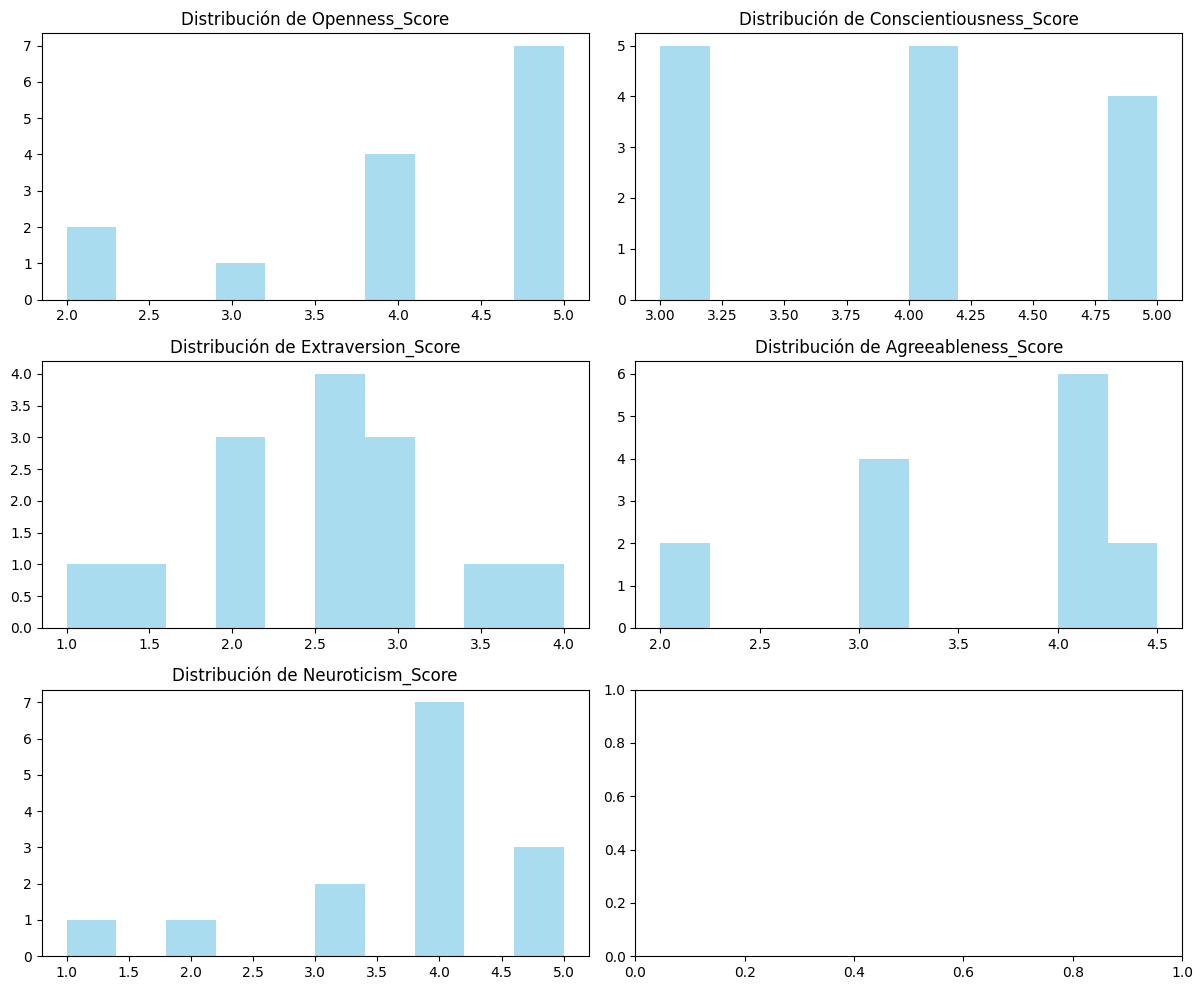

   Nickname  Weighted_Score
0    FRALEO             3.8
1    JOHFON             3.8
2    FERLEO             3.7
3    FRALEO             3.6
4    LUIARI             2.6
5    DAVVAL             4.0
6    ALDFON             3.0
7    VALALI             3.7
8    NATCAI             4.0
9    YEAARA             3.9
10   MAUMAR             2.9
11   LORBEC             3.6
12   CESPIN             4.3
13   DIEARI             2.9


In [15]:
# Usando el script
filepath = '/content/drive/My Drive/Diplomado_DS/OCEAN_BigFive2024-1.xlsx'  # Asegúrate de que la ruta sea correcta
data = cargar_datos(filepath)
data = limpiar_y_preparar_datos(data)
data = calcular_scores(data)
analisis_exploratorio(data)
weights = {'Openness': 0.2, 'Conscientiousness': 0.2, 'Extraversion': 0.2, 'Agreeableness': 0.2, 'Neuroticism': 0.2}
data = calcular_score_ponderado(data, weights)
print(data[['Nickname', 'Weighted_Score']])

###Implementación de PCA en Python
Vamos a implementar PCA utilizando la librería scikit-learn, que es una de las bibliotecas de aprendizaje automático más utilizadas en Python. Aquí está el código para realizar PCA en tu conjunto de datos y cómo interpretar los resultados:

Preparar los datos: Asegúrate de que los datos estén adecuadamente preprocesados y normalizados.

Aplicar PCA: Decidir cuántos componentes principales deseas extraer.

Análisis de los Componentes: Interpretar los componentes principales en
términos de las variables originales.

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

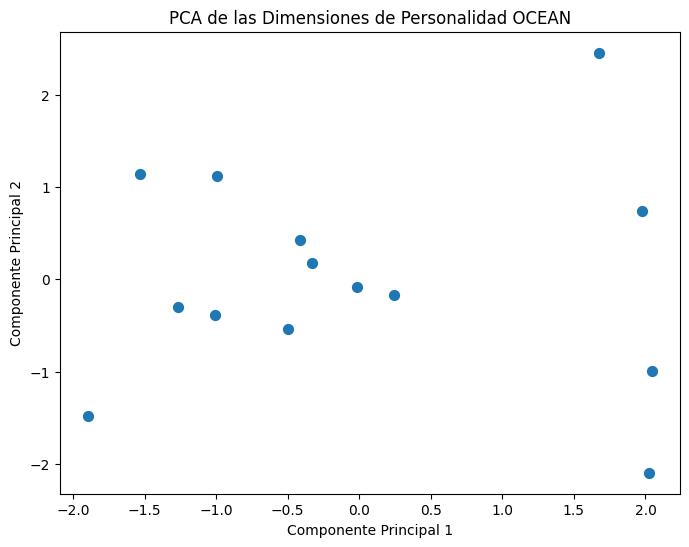

Varianza de cada componente: [0.35900473 0.24933221]


In [17]:
# 1. Preparar los datos
# Seleccionar solo las columnas de scores para PCA
features = ['Openness_Score', 'Conscientiousness_Score', 'Extraversion_Score', 'Agreeableness_Score', 'Neuroticism_Score']
x = data.loc[:, features].values

# Normalizando los features
x = StandardScaler().fit_transform(x)

# 2. Aplicar PCA
pca = PCA(n_components=2)  # Decidimos extraer 2 componentes principales
principalComponents = pca.fit_transform(x)

# Crear un DataFrame con los componentes principales
principalDf = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2'])

# 3. Visualización de los Componentes Principales
plt.figure(figsize=(8,6))
plt.scatter(principalDf['Principal Component 1'], principalDf['Principal Component 2'], s=50)
plt.title('PCA de las Dimensiones de Personalidad OCEAN')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# Varianza explicada por cada componente
print('Varianza de cada componente:', pca.explained_variance_ratio_)


#Normalizacion de SCORES

Si aún no has normalizado los datos antes de realizar PCA, te recomendaría hacerlo para asegurarte de que los resultados son válidos y útiles. Aquí te muestro cómo puedes normalizar los scores antes de aplicar PCA:

In [20]:
from sklearn.preprocessing import StandardScaler

# Seleccionando las columnas de los scores
features = ['Openness_Score', 'Conscientiousness_Score', 'Extraversion_Score', 'Agreeableness_Score', 'Neuroticism_Score']
x = data.loc[:, features].values

# Normalizando los features
x = StandardScaler().fit_transform(x)

# Aplicar PCA
pca = PCA(n_components=2)  # Ajusta el número de componentes según lo necesites
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])


#PCA

#Interpretación de los Cuadrantes

Los componentes principales se organizan de manera que el Componente Principal 1 (eje x) capture la mayor varianza, seguido por el Componente Principal 2 (eje y). Aquí te dejo una interpretación general de lo que podría significar cada cuadrante, aunque la interpretación específica dependerá de cómo los componentes estén cargados de las variables originales del OCEAN:
____________

###Cuadrante Superior Derecho:
Alumnos con puntuaciones altas en ambas componentes principales. Si el primer componente se carga positivamente por características como la extraversión y la apertura, y el segundo por la amabilidad y la conciencia, estos alumnos podrían ser muy sociables, abiertos y conscientes.

###Cuadrante Superior Izquierdo:
Alumnos con puntuaciones altas en el segundo componente principal pero bajas en el primero. Si esto refleja una alta conciencia pero baja apertura o extraversión, estos alumnos podrían ser más reservados pero muy confiables y atentos.

###Cuadrante Inferior Derecho:
Alumnos con puntuaciones altas en el primer componente principal pero bajas en el segundo. Estos podrían ser alumnos muy abiertos y extrovertidos pero menos concientes o amables.

###Cuadrante Inferior Izquierdo:
Alumnos con puntuaciones bajas en ambos componentes. Si los componentes están asociados positivamente con todas las cualidades del OCEAN, estos alumnos podrían ser más reservados y menos proclives a los comportamientos considerados típicamente positivos en las dimensiones del OCEAN.

###Recuerda, esta interpretación depende fuertemente de cómo las variables originales carguen en cada componente, por lo que podría ser útil examinar las cargas de cada variable (usando pca.components_ en scikit-learn) para entender mejor qué significa cada componente en tu contexto específico.

In [21]:
import plotly.express as px

# Suponiendo que 'principalDf' es tu DataFrame de componentes principales y 'data' contiene los nombres o identificadores
principalDf['Nickname'] = data['Nickname']  # Asegúrate de que 'Nickname' es la columna con los identificadores de los alumnos

# Creando el gráfico
fig = px.scatter(principalDf, x='Principal Component 1', y='Principal Component 2', text='Nickname')
fig.update_traces(textposition='top center')
fig.update_layout(
    title='PCA de las Dimensiones de Personalidad OCEAN',
    xaxis_title='Componente Principal 1',
    yaxis_title='Componente Principal 2'
)

# Mostrar el gráfico
fig.show()

#Exportar Resultados


In [22]:
# Suponiendo que 'data' contiene los scores y 'principalDf' contiene los componentes principales
data_final = pd.concat([data, principalDf], axis=1)

# Exportando a Excel
data_final.to_excel('/content/drive/My Drive/Diplomado_DS/resultados_pca_v2.xlsx', index=False)

# Exportando a CSV
#data_final.to_csv('/content/drive/My Drive/Diplomado_DS/resultados_pca.csv', index=False)


#Iteracion Cluster Analysis KMEANS

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

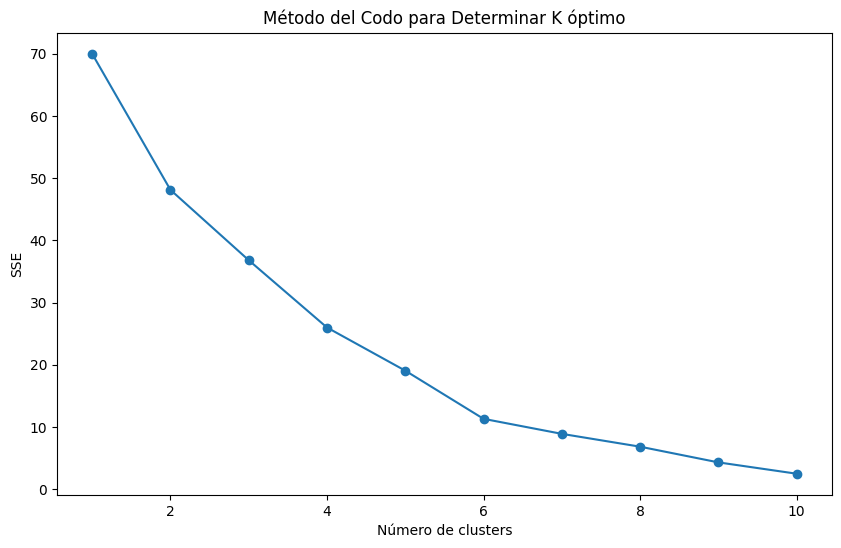

Centroides de cada cluster (en el espacio de features normalizados): [[-1.07871978e+00 -1.16275535e+00 -3.30718914e-01 -1.87082869e+00
  -1.95283366e-01]
 [ 1.01129979e-01  1.34164079e+00 -1.65359457e-01  7.79511956e-01
   3.25472277e-02]
 [ 8.09039835e-01 -2.23606798e-01  4.96078371e-01 -3.11804782e-01
   7.16039010e-01]
 [-1.55065968e+00  8.94427191e-02  6.61437828e-01  9.35414347e-01
   7.16039010e-01]
 [ 8.09039835e-01 -1.16275535e+00 -9.92156742e-01 -1.58603289e-17
  -2.01792812e+00]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [24]:
# Asumiendo que 'x' son tus datos normalizados de scores de personalidad
# Determinar el número óptimo de clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

# Gráfico del método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Método del Codo para Determinar K óptimo')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.show()

# Aplicar KMeans con el número óptimo de clusters (por ejemplo, k=5)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(x)

# Añadir la asignación de cluster al DataFrame original para análisis
data['Cluster'] = clusters

# Análisis de los centroides
centroids = kmeans.cluster_centers_
print("Centroides de cada cluster (en el espacio de features normalizados):", centroids)


##Código para Graficar la Distribución de Clusters en un Diagrama de Pie

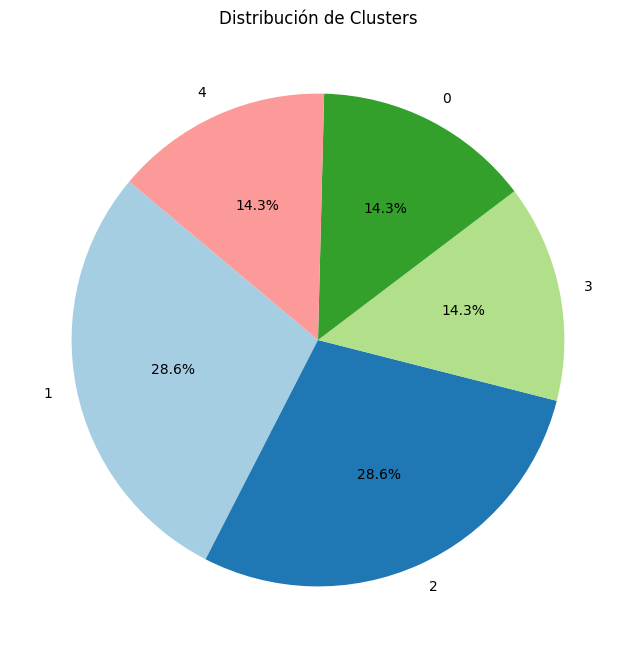

In [25]:
import matplotlib.pyplot as plt

# Contar la frecuencia de cada cluster
cluster_counts = data['Cluster'].value_counts()

# Crear un gráfico de pie
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(cluster_counts))))
plt.title('Distribución de Clusters')
plt.show()

In [26]:
import pandas as pd

# Suponiendo que 'data' es tu DataFrame y ya contiene una columna 'Cluster' asignada

# Agrupar los datos por cluster y luego listar los nicknames asociados con cada uno
cluster_groups = data.groupby('Cluster')['Nickname'].apply(list)

# Convertir el resultado en un DataFrame para mejor visualización
cluster_table = pd.DataFrame(cluster_groups).reset_index()
cluster_table.columns = ['Cluster', 'Nicknames']

# Mostrar la tabla
print(cluster_table)

# Si deseas exportar esta tabla a un archivo Excel
#cluster_table.to_excel('/content/drive/My Drive/path_to_save/cluster_nickname_table.xlsx', index=False)


   Cluster                         Nicknames
0        0                  [LUIARI, DIEARI]
1        1  [FRALEO, FRALEO, YEAARA, CESPIN]
2        2  [JOHFON, DAVVAL, VALALI, NATCAI]
3        3                  [FERLEO, LORBEC]
4        4                  [ALDFON, MAUMAR]


#Redefinición de los Scores:

Modifica el cálculo de los scores de personalidad en tu dataset para reflejar estos nuevos pesos. Por ejemplo, si 'Extraversión' es más relevante para tus necesidades, las preguntas que evalúan este rasgo podrían tener un peso mayor en el score final de Extraversión.

In [28]:
print(data.columns)

Index(['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness',
       'Frecuentemente me preocupo por situaciones futuras o imprevistas.',
       'Regularmente me interesa aprender sobre tradiciones y culturas diferentes.',
       'Prefiero actividades que requieren un enfoque detallado a tareas mas flexibles.',
       'Extraversion_2', 'Agreeableness_2', 'Neuroticism_2', 'Nickname',
       'Openness_Score', 'Conscientiousness_Score', 'Extraversion_Score',
       'Agreeableness_Score', 'Neuroticism_Score', 'Weighted_Score',
       'Cluster'],
      dtype='object')


###Ajuste del Código para Referenciar Correctamente las Columnas

Basado en los nombres de las columnas que proporcionaste, aquí te muestro cómo podrías ajustar el cálculo de los scores de Extraversión si, por ejemplo, las preguntas relevantes se relacionan con las columnas 'Extraversion' y 'Extraversion_2':

In [29]:
# Asumiendo que quieres ajustar el score de Extraversión basándote en un nuevo peso dado a las respuestas
# Aquí, puedes ajustar los pesos según lo consideres necesario
peso_pregunta_1 = 0.6  # Supongamos que deseas darle más peso a la primera pregunta de Extraversión
peso_pregunta_2 = 0.4  # Y menos a la segunda pregunta

# Calculando el nuevo score de Extraversión con los pesos ajustados
data['Extraversion_Score'] = (data['Extraversion'] * peso_pregunta_1 + data['Extraversion_2'] * peso_pregunta_2)

##Pasos Siguientes para Utilizar los Datos Ajustados

###Revisión de Datos:
Asegúrate de que los cambios en los scores han sido calculados correctamente visualizando los datos ajustados

In [30]:
# Ver los primeros registros para confirmar los cambios
print(data[['Nickname', 'Extraversion', 'Extraversion_2', 'Extraversion_Score']].head())

  Nickname  Extraversion  Extraversion_2  Extraversion_Score
0   FRALEO             2               2                 2.0
1   JOHFON             2               4                 2.8
2   FERLEO             4               1                 2.8
3   FRALEO             1               1                 1.0
4   LUIARI             2               2                 2.0


###Continuar con el Análisis:

Una vez ajustados los scores, puedes continuar con cualquier análisis subsecuente, como el clustering o la evaluación de cómo los scores ajustados podrían influir en los clusters existentes.

###Evaluación de Clusters:

Si has cambiado los scores significativamente, puede ser útil re-ejecutar el análisis de clustering para ver si los nuevos scores resultan en una mejor segmentación de datos.

In [31]:
from sklearn.cluster import KMeans

# Puede que desees re-evaluar el número óptimo de clusters o simplemente reutilizar el mismo número
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Openness_Score', 'Conscientiousness_Score', 'Extraversion_Score', 'Agreeableness_Score', 'Neuroticism_Score']])

# Revisar cómo se distribuyen los clusters con los nuevos scores
print(data['Cluster'].value_counts())

Cluster
2    5
4    3
1    2
0    2
3    2
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



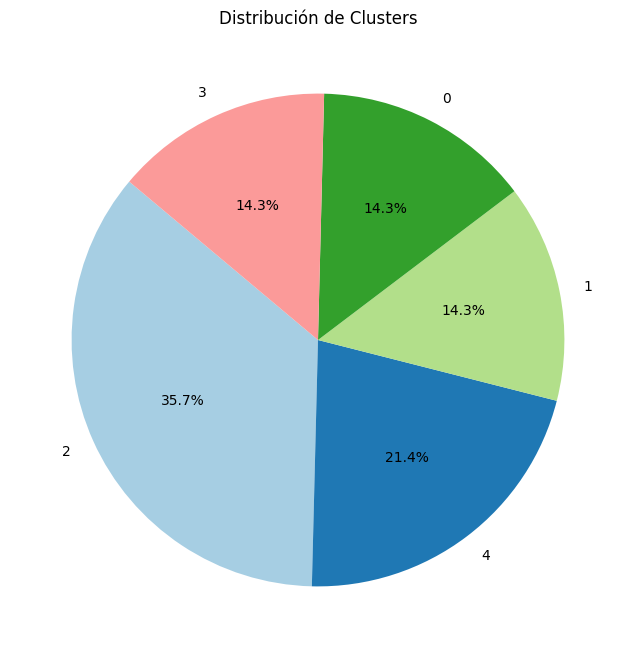

In [32]:
import matplotlib.pyplot as plt

# Contar la frecuencia de cada cluster
cluster_counts = data['Cluster'].value_counts()

# Crear un gráfico de pie
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(cluster_counts))))
plt.title('Distribución de Clusters')
plt.show()

In [33]:
import pandas as pd

# Suponiendo que 'data' es tu DataFrame y ya contiene una columna 'Cluster' asignada

# Agrupar los datos por cluster y luego listar los nicknames asociados con cada uno
cluster_groups = data.groupby('Cluster')['Nickname'].apply(list)

# Convertir el resultado en un DataFrame para mejor visualización
cluster_table = pd.DataFrame(cluster_groups).reset_index()
cluster_table.columns = ['Cluster', 'Nicknames']

# Mostrar la tabla
print(cluster_table)

# Si deseas exportar esta tabla a un archivo Excel
#cluster_table.to_excel('/content/drive/My Drive/path_to_save/cluster_nickname_table.xlsx', index=False)

   Cluster                                 Nicknames
0        0                          [LUIARI, DIEARI]
1        1                          [FERLEO, LORBEC]
2        2  [JOHFON, DAVVAL, VALALI, NATCAI, CESPIN]
3        3                          [ALDFON, MAUMAR]
4        4                  [FRALEO, FRALEO, YEAARA]
